# Лабораторная работа: основы компьютерного зрения

### Материалы

*   [Библиотека OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
*   [Понятие фильтров](https://www.geeksforgeeks.org/python-opencv-filter2d-function/)
*   [Шпаргалка по OpenCV](https://tproger.ru/translations/opencv-python-guide)
*   Новый пункт




?? Посмотреть магические комманды для OpenCV ??

## Домашка
1. Прочитать про цветовые пространства и для чего их используют
2. Воспользоваться для окна генератором ImageDataGenerator(?) от Keras (у Ф. Шалле стр.169, раздел 5.2.5. Расширение данных)
3. Прочтитать [Понимание сверточных нейронных сетей через визуализации в PyTorch / Хабр
](https://habr.com/ru/articles/436838/)
4. Почитать про Каскад Хаара
5. Попытаться найти площадь клеток в синем канале (только КЗ без нейросетей)

## Введение в компьютерное зрение
### Введение в OpenCV и понимание сверточных нейронных сетей (CNN)

__Материалы к семинару__
* [Шпаргалка по OpenCV — Python](https://tproger.ru/translations/opencv-python-guide/)
* [Введение в обработку изображений в Python с OpenCV](https://dev-gang.ru/article/vvedenie-v-obrabotku-izobrazhenii-v-python-s-opencv-bpvt25yc6e/)
* [О цветовых пространствах](https://habr.com/ru/post/181580/)
* [OpenCV's face detection](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)



### Используемые библиотеки
* библиотека [numpy](https://numpy.org/)
* библиотека [matplotlib](https://matplotlib.org/)
* библиотека [pandas](https://pandas.pydata.org/)
* библиотека [seaborn](https://seaborn.pydata.org/)
* библиотека [scikit-learn](https://scikit-learn.org/stable/index.html)
* библиотека [OpenCV](https://opencv.org/)

In [ ]:
import numpy as np # математическая библиотека
import cv2 # обработка изображений
from matplotlib import pyplot as plt # визуализация данных
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

%matplotlib inline

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/window.jpg')

**Замечание**: OpenCV читает по умолчанию изображения не в RGB, а в последовательности BGR.

In [ ]:
img.shape # исследование каналов: третий параметр shape - количество каналов (глубина матрицы)

(960, 1280, 3)

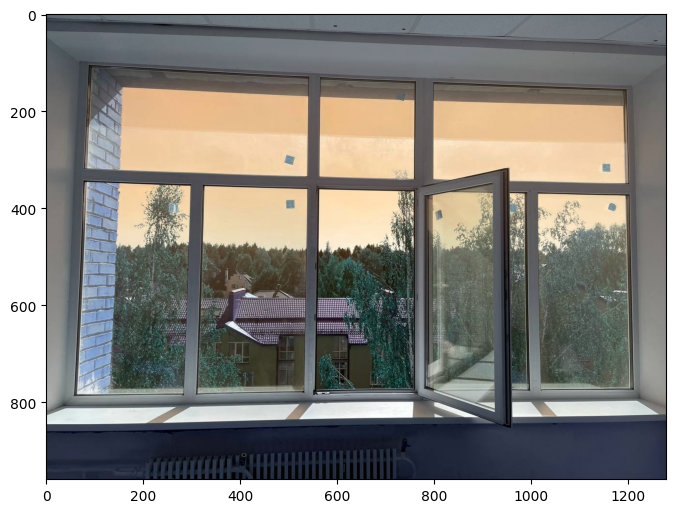

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [ ]:
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

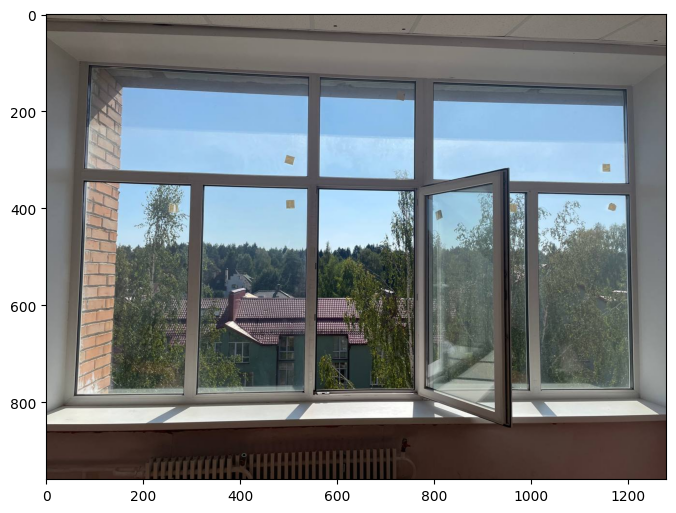

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(imgRGB)

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(960, 1280)

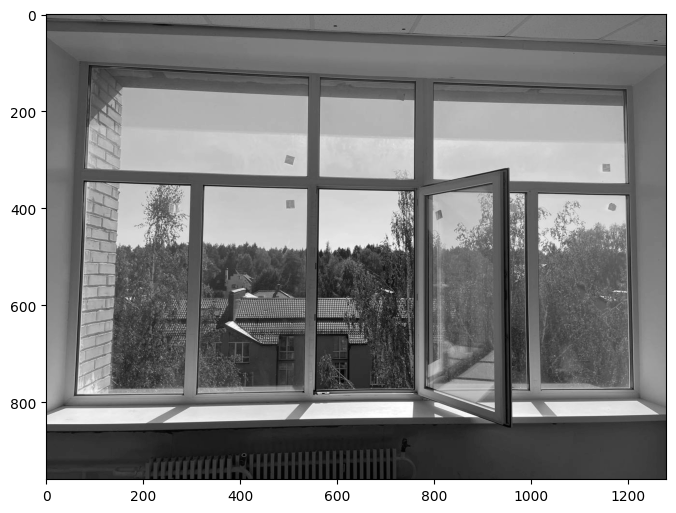

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_gray, cmap='gray') # cmap='gray' необходим, чтобы plt не пытался одномерную матрицу оттенков серого интерретировать как цвет

# Цвет

In [ ]:
rs = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/red-square.jpeg')

In [ ]:
rs.shape

(32, 32, 3)

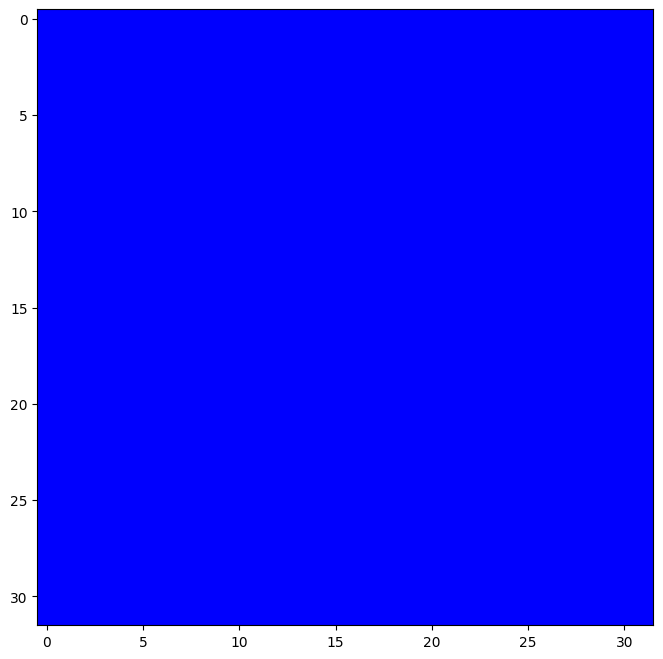

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(rs)

In [ ]:
print(rs)

[[[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 ...

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]]


In [ ]:
rsRGB = cv2.cvtColor(rs,cv2.COLOR_BGR2RGB)

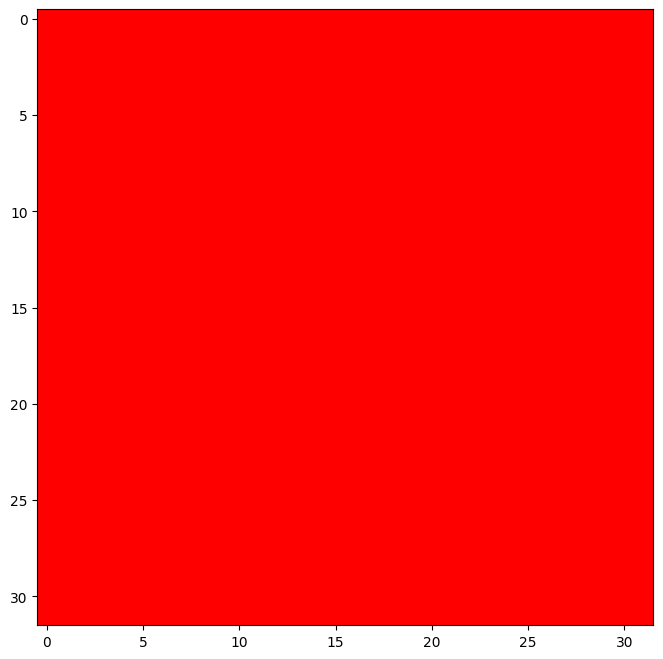

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(rsRGB)

In [ ]:
img_dig = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/number-seven.jpeg', 0)
# 0 означает что чтение в градации серого

img_dig.shape

(16, 16)

In [ ]:
img_dig

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   0,  64, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        207, 128,   0],
       [  0,   0,  64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 255,  63],
       [  0,   1,   0,  64,  64,  64,  64,  64,  64,  64,  64, 160, 255,
        255,  64,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 129, 255, 255,
         64,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255, 128,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0, 255, 255, 128,   0,
          0,   0,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0, 207, 255, 128,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 159, 255, 255,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 160, 255, 255,  64,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,  64, 207, 255, 255, 128,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0, 128, 255, 255, 255,  64,   0,   0,   0,   0,   1,
          0,   0,   0],
       [  0,   0,   0, 255, 254, 191,  64,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0, 128, 255, 191,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,  64,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=uint8)

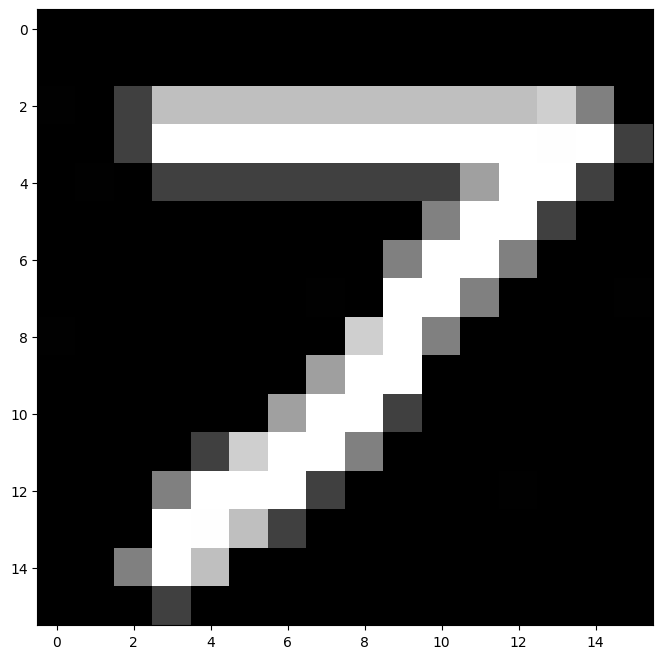

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(img_dig, cmap='gray')

[Функция преобразования RGB -> Gray и обратно](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)

In [ ]:
diag = np.zeros(shape=(16, 16))

In [ ]:
for i in range(len(diag)):
  diag[i][i] = 1

In [ ]:
diag

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
# imgRGB
r = imgRGB[:len(imgRGB),:len(imgRGB[0]),:1]
g = imgRGB[:len(imgRGB),:len(imgRGB[0]),1:2]
b = imgRGB[:len(imgRGB),:len(imgRGB[0]),2:3]

print(r.shape)
print(g.shape)
print(b.shape)

(960, 1280, 1)
(960, 1280, 1)
(960, 1280, 1)


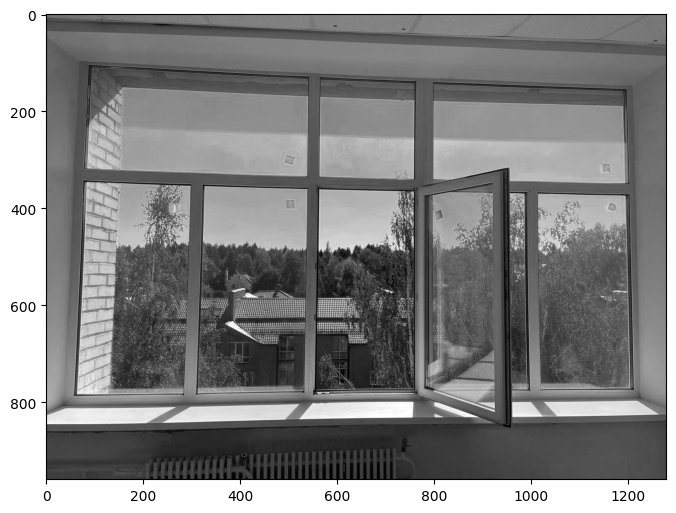

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(r, cmap='gray')

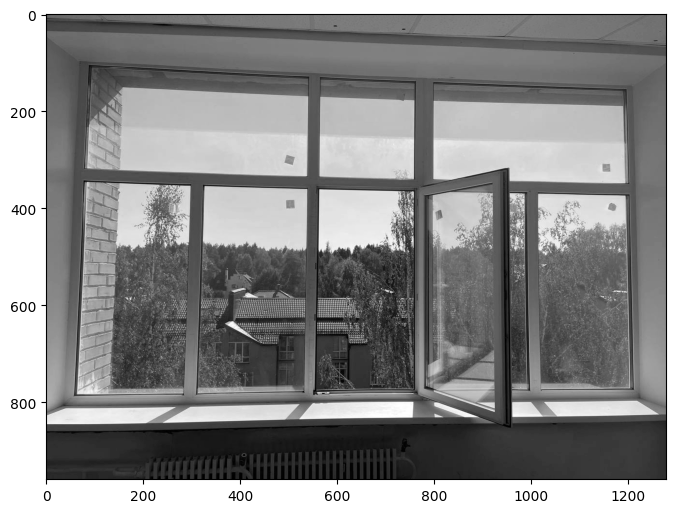

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(g, cmap='gray')

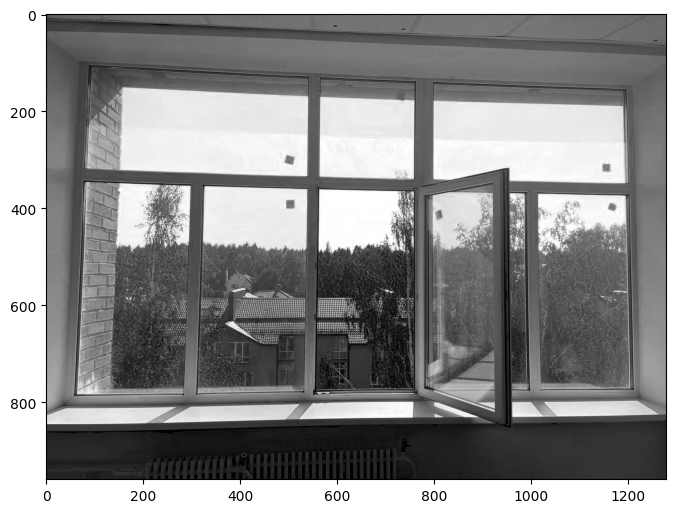

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(b, cmap='gray')

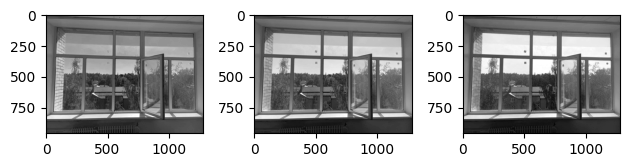

In [ ]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(r, cmap='gray')
axes[1].imshow(g, cmap='gray')
axes[2].imshow(b, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
# rsRGB
r_s = rsRGB[:,:,:1]
g_s = rsRGB[:,:,1:2]
b_s = rsRGB[:,:,2:3]

print(r.shape)
print(g.shape)
print(b.shape)

(960, 1280, 1)
(960, 1280, 1)
(960, 1280, 1)


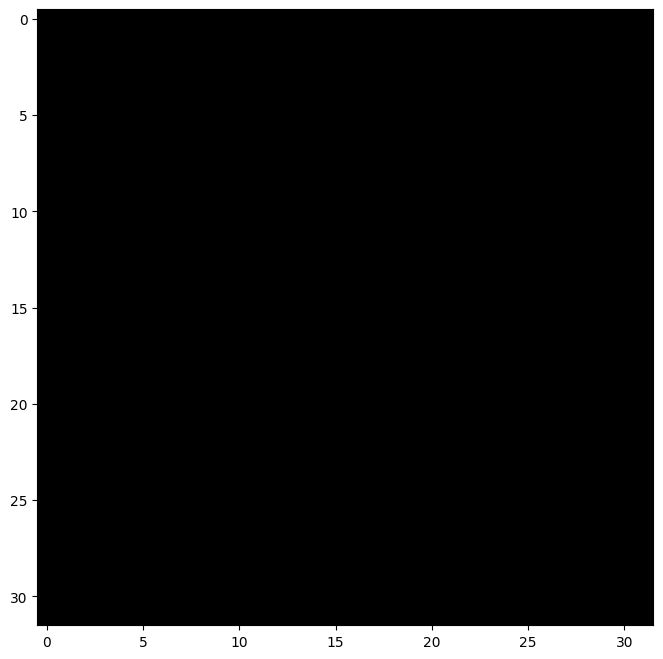

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(r_s, cmap='gray')

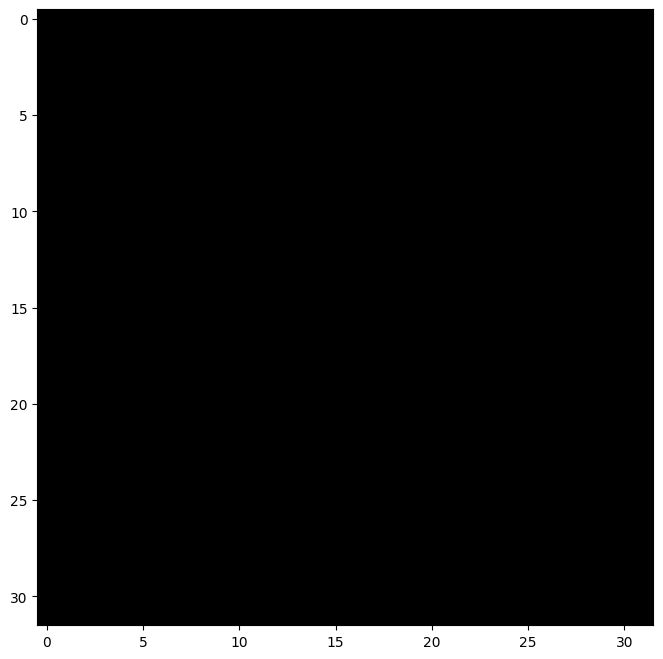

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(g_s, cmap='gray')

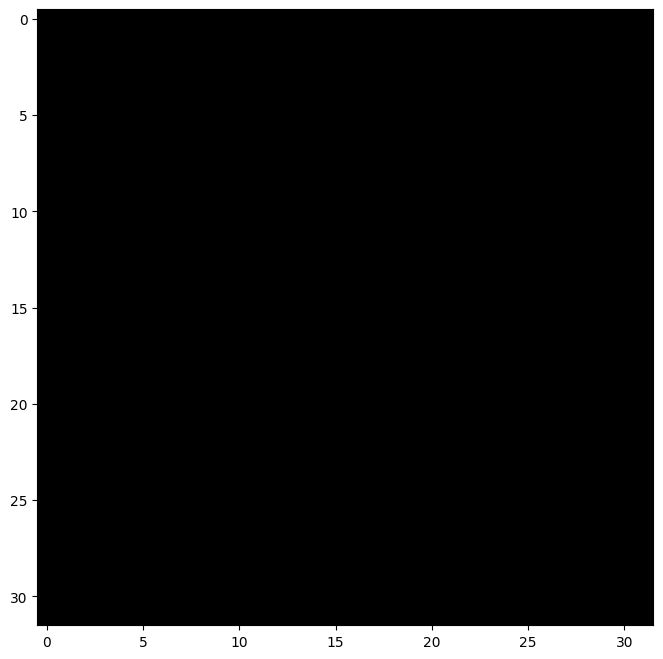

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(b_s, cmap='gray')

In [ ]:
r_s

array([[[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       ...,

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]]], dtype=uint8)

In [ ]:
g_s

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [ ]:
b_s

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [ ]:
cells = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/cells-1.jpg') # data from LRB JINR
cells.shape

(964, 1280, 3)

In [ ]:
cells = cv2.cvtColor(cells,cv2.COLOR_BGR2RGB)

In [ ]:
# cells
r_c = cells[:,:,:1]
g_c = cells[:,:,1:2]
b_c = cells[:,:,2:3]

print(r.shape)
print(g.shape)
print(b.shape)

(960, 1280, 1)
(960, 1280, 1)
(960, 1280, 1)


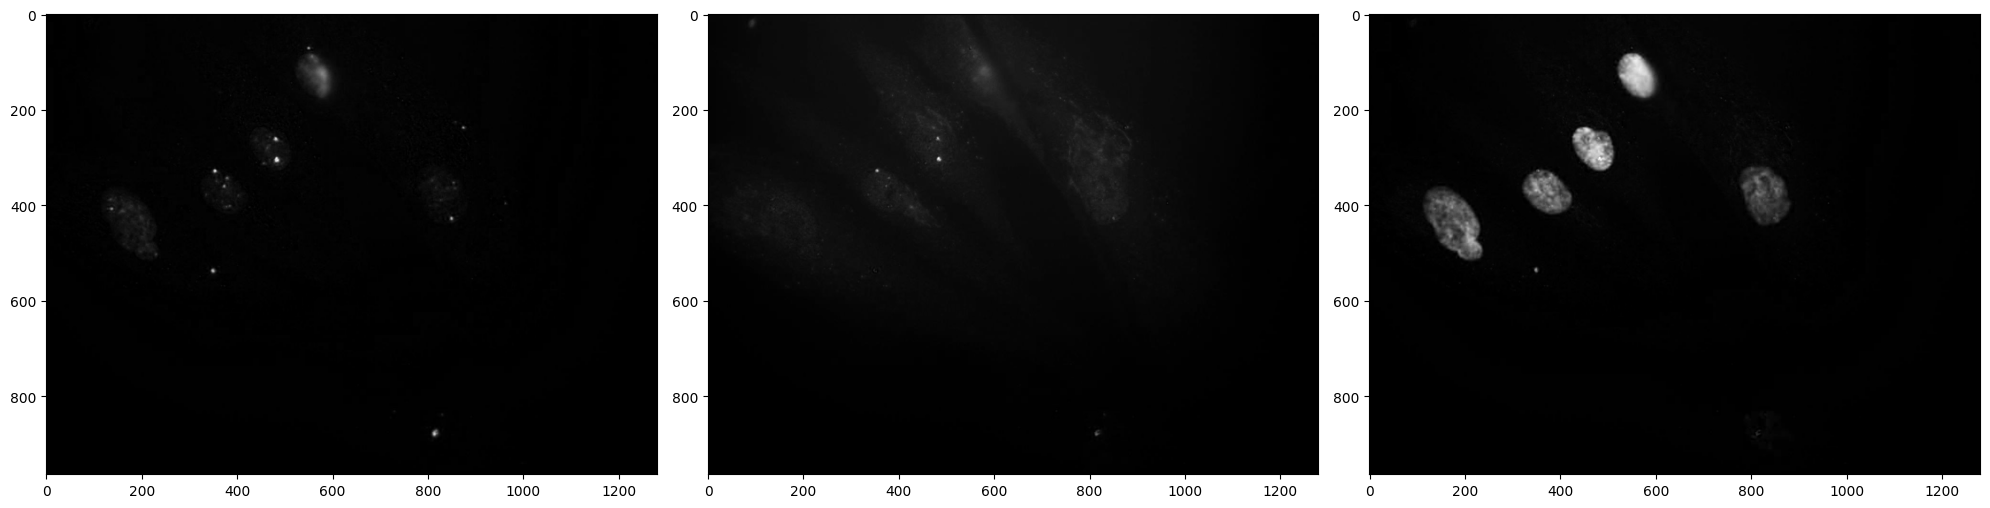

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 16))
axes[0].imshow(r_c, cmap='gray')
axes[1].imshow(g_c, cmap='gray')
axes[2].imshow(b_c, cmap='gray')
plt.tight_layout()
plt.show()

## Поиск контуров с помощью Canny и определение площадей ДОМАШКА

In [ ]:
kernel = np.ones((5,5),np.uint8)

for _ in range(3):
  d_cells = cv2.dilate(b_c, kernel, iterations = 3)
  ed_cells = cv2.erode(b_c, kernel, iterations = 3)

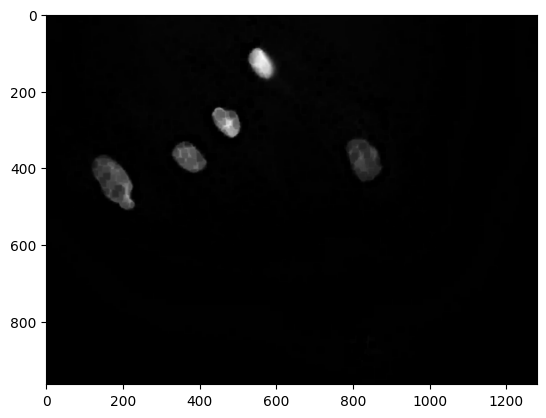

In [ ]:
plt.imshow(ed_cells, cmap='gray')
plt.show()

In [ ]:
blurred_cells = cv2.GaussianBlur(ed_cells, (5, 5), 0)
# Добаляем блюр к изображениям клеток

In [ ]:
edges = cv2.Canny(blurred_cells, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Определение контуров

In [ ]:
b_cells_contours = b_c.copy()

In [ ]:
cv2.drawContours(b_cells_contours, contours, -1, (0, 255, 0), 2)

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [ ]:
areas = [cv2.contourArea(c) for c in contours]

In [ ]:
print(f'Найдено контуров: {len(contours)}')
print('Площади контуров:', areas)

Найдено контуров: 5
Площади контуров: [9.5, 36.0, 10.0, 16.0, 28.5]


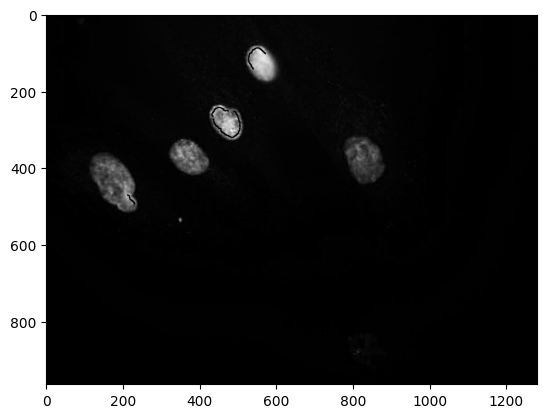

In [ ]:
plt.imshow(b_cells_contours, cmap='gray')

plt.show()

## Вращение - некорректный пример с черными областями

In [ ]:
(h, w, d) = imgRGB.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 123, 1.0)
rotated = cv2.warpAffine(imgRGB, M, (w, h))

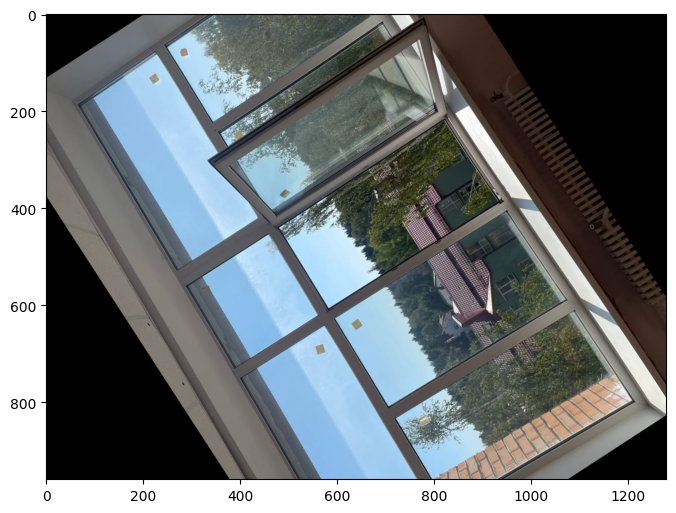

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(rotated)

## Имплементация ImageDataGenerator ДОМАШКА

In [ ]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

In [ ]:
x = img_to_array(imgRGB)
x = x.reshape((1,) + x.shape)

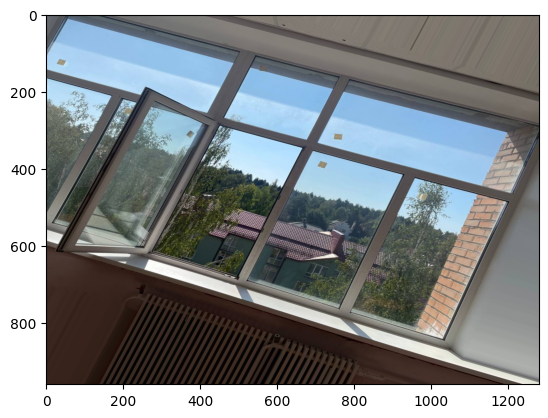

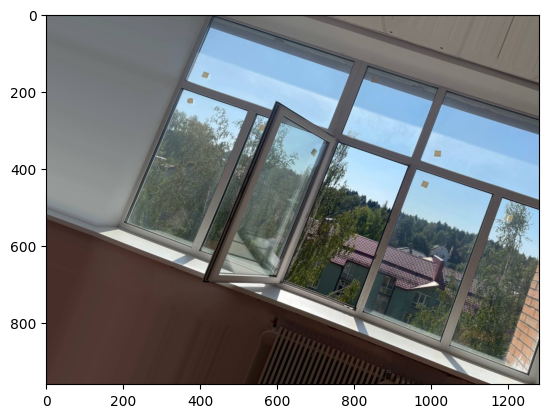

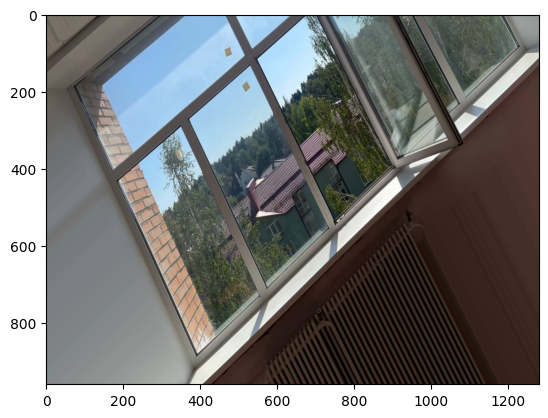

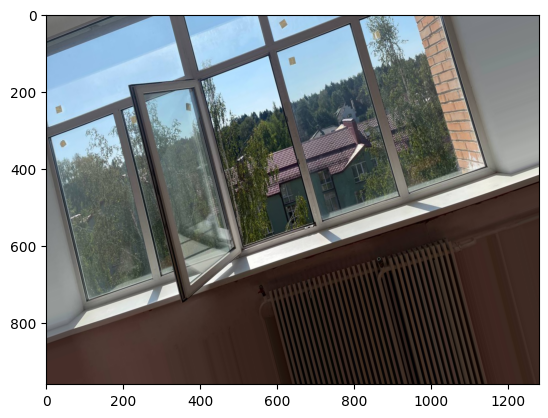

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

# Морфология (dialation&errosion) для изображения с низким числом пикселей

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img_dig,kernel,iterations = 1)

array([[ 64, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 207, 207,
        207, 207, 207],
       [ 64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [ 64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [ 64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [ 64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [ 64, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [  1,  64,  64,  64,  64,  64, 207, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [  1,   1,   1,   0,   0, 159, 255, 255, 255, 255, 255, 255, 255,
        255, 255,  64],
       [  1,   1,   1,   0, 160, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 128,   1],
       [  1,   1,  64, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        128,   1,   1],
       [  1, 128, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 128,
          1,   1,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   1,
          1,   1,   0],
       [128, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  64,   1,
          1,   1,   0],
       [128, 255, 255, 255, 255, 255, 255, 255, 255, 255, 128,   1,   1,
          1,   1,   0],
       [128, 255, 255, 255, 255, 255, 255, 255, 255,  64,   1,   1,   1,
          1,   1,   0],
       [128, 255, 255, 255, 255, 255, 254, 191,  64,   0,   0,   0,   0,
          0,   0,   0]], dtype=uint8)

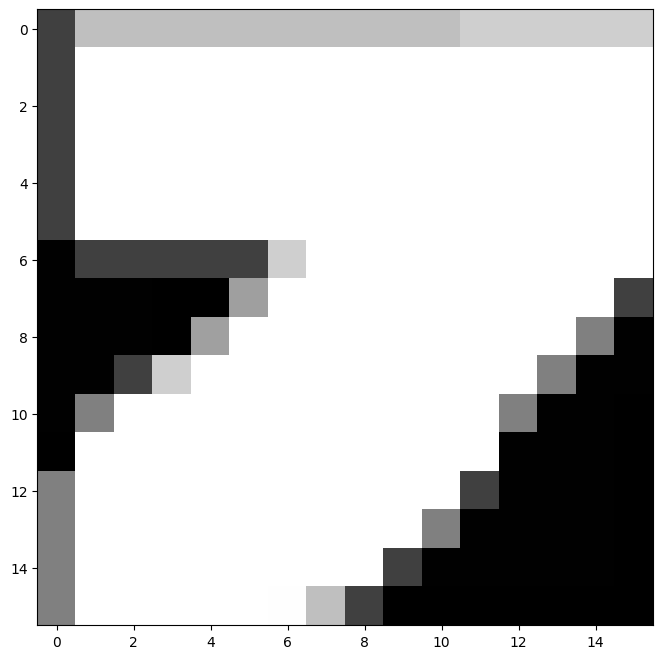

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(dilation, cmap='gray')

In [ ]:
erosion = cv2.erode(dilation, kernel, iterations = 1)

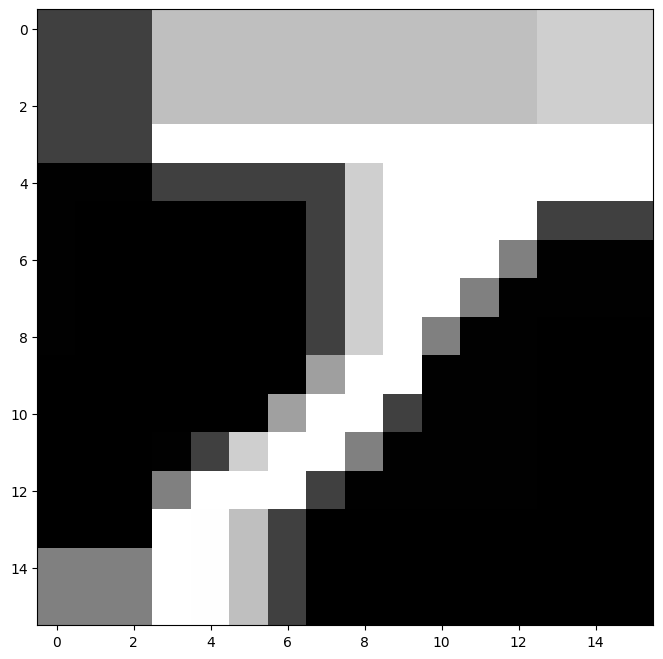

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(erosion, cmap='gray')

In [ ]:
bigger_seven = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/bigger-seven.jpeg')

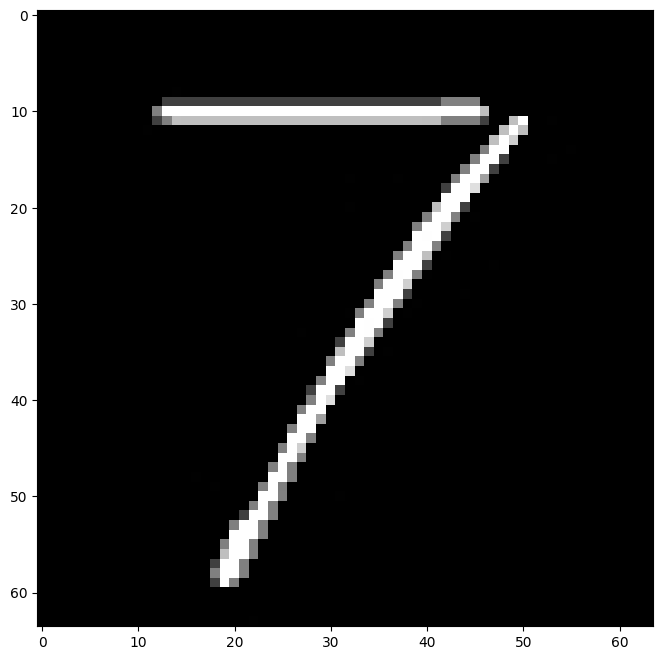

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(bigger_seven, cmap='gray')

In [ ]:
dilation2 = cv2.dilate(bigger_seven,kernel,iterations = 1)

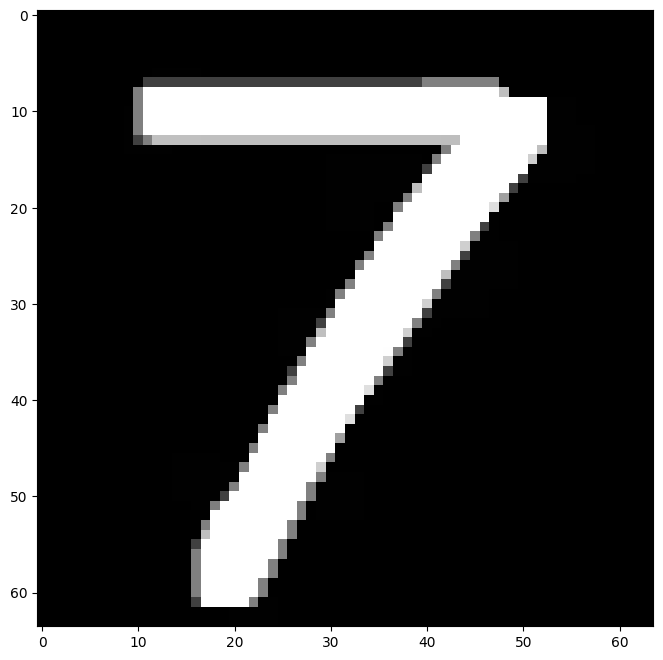

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(dilation2, cmap='gray')

In [ ]:
erosion2 = cv2.erode(dilation2, kernel, iterations = 1)

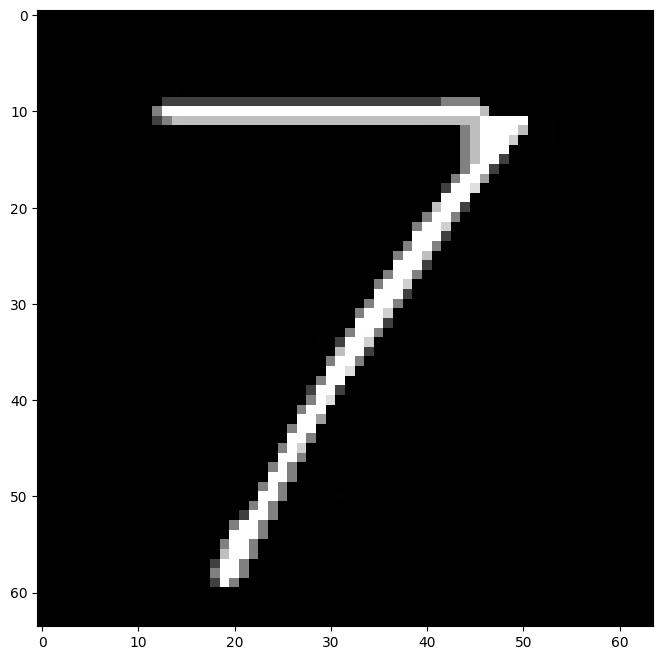

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(erosion2, cmap='gray')

In [ ]:
blured2 = cv2.GaussianBlur(bigger_seven,(5,5),0)

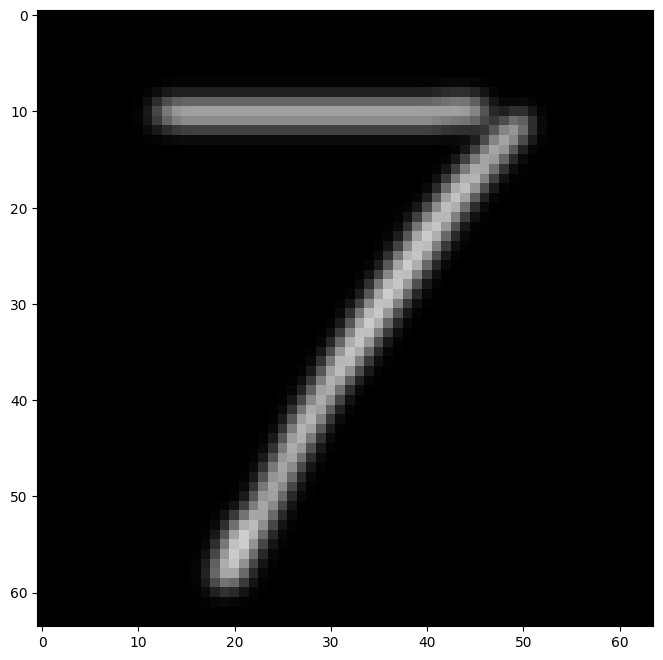

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(blured2, cmap='gray')

## Оператор Собеля

См: [Понимание сверточных нейронных сетей через визуализации в PyTorch / Хабр
](https://habr.com/ru/articles/436838/)

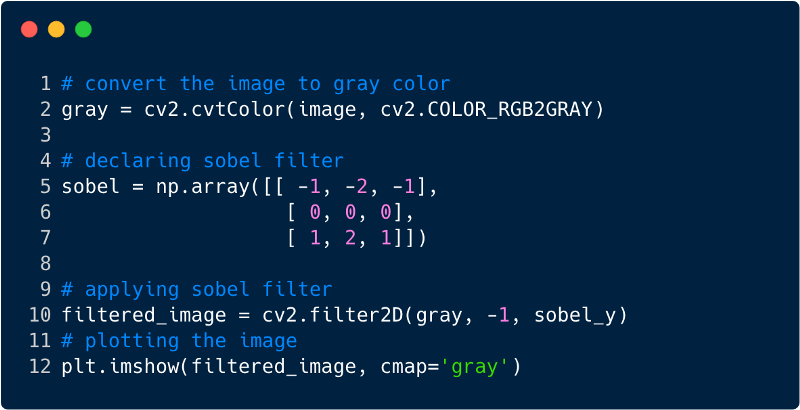


См. метод конечных разностей (!!)


In [ ]:
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1],])

filtered_image = cv2.filter2D(img_gray, -1, sobel_y)

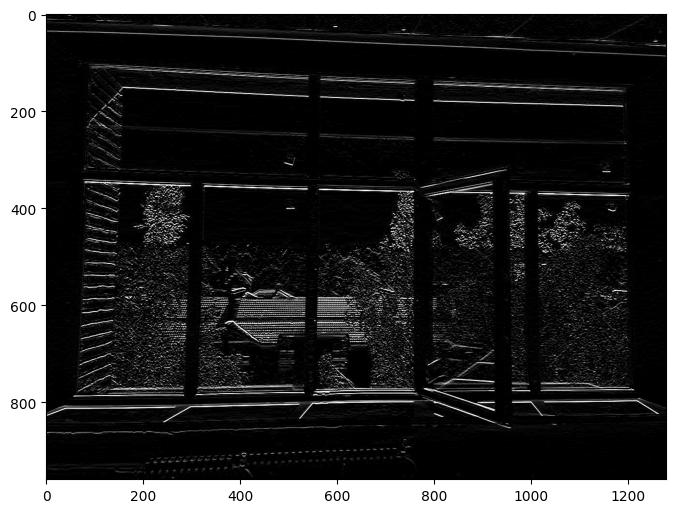

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(filtered_image, cmap='gray')

In [ ]:
sobel_x = sobel_y.transpose()

filtered_image_x = cv2.filter2D(img_gray, -1, sobel_x)

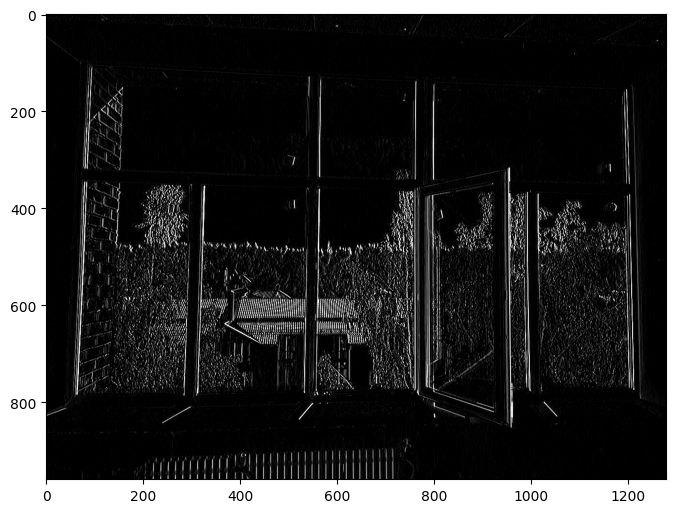

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(filtered_image_x, cmap='gray')

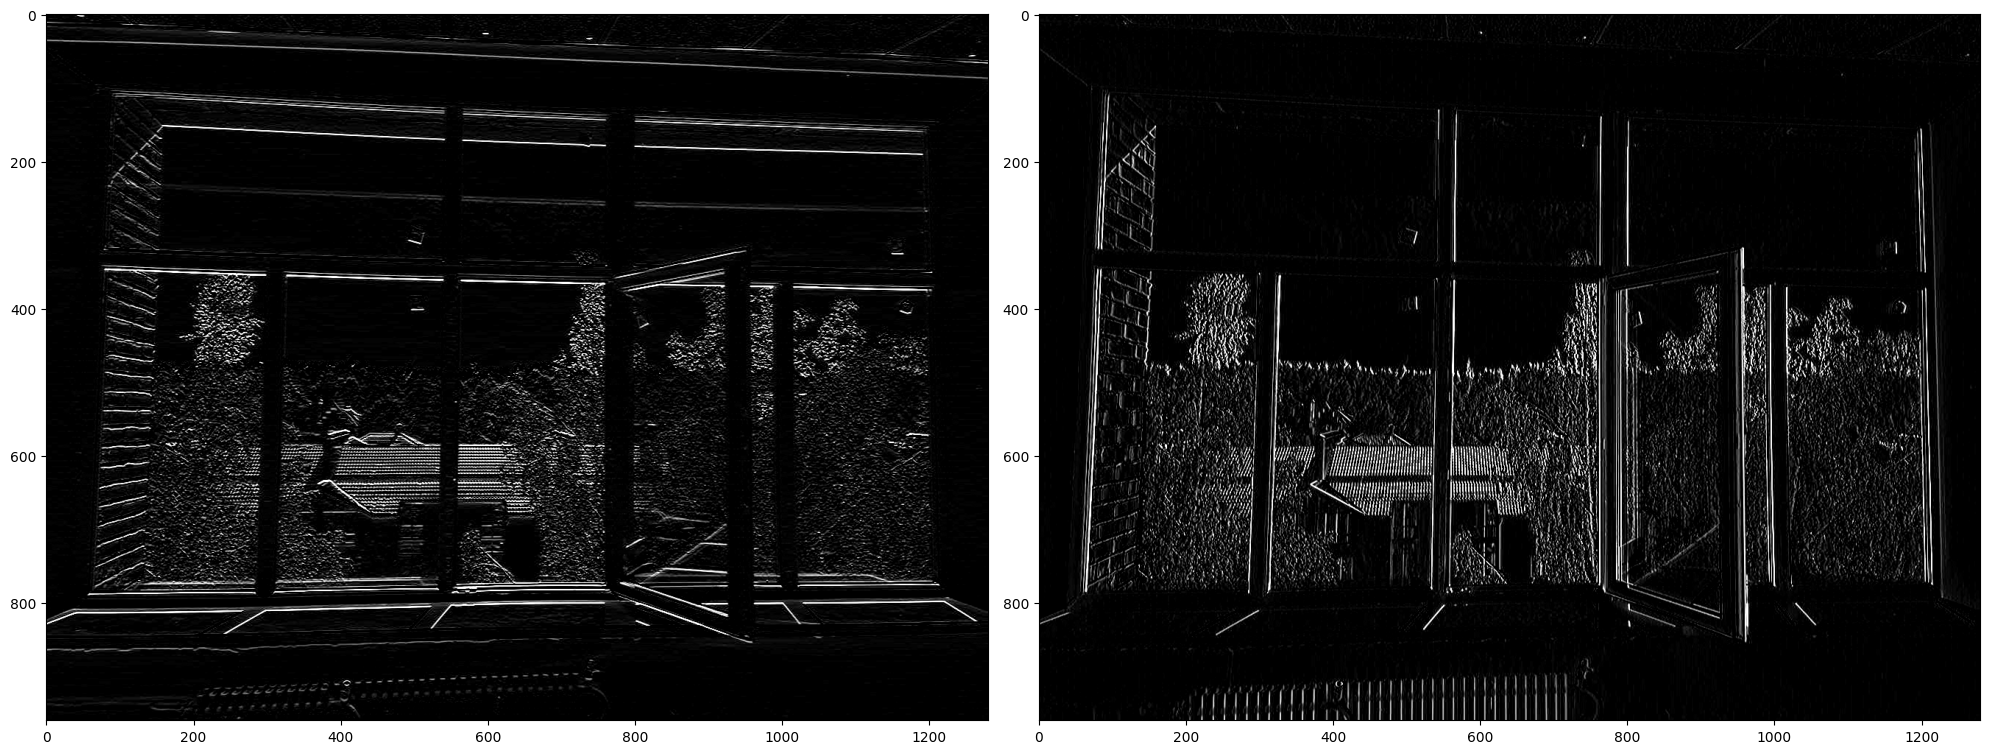

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(filtered_image, cmap='gray')
axes[1].imshow(filtered_image_x, cmap='gray')
plt.tight_layout()
plt.show()

## Распознание лиц

In [ ]:
ph_haar = cv2.data.haarcascades

content = os.listdir(ph_haar)

content

['haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_smile.xml',
 'haarcascade_eye.xml',
 'haarcascade_upperbody.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_frontalface_alt_tree.xml',
 '__pycache__',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_license_plate_rus_16stages.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_profileface.xml',
 '__init__.py']

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
image = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/faces.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/content/drive/MyDrive/DLinAT-2024-A/images/faces.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

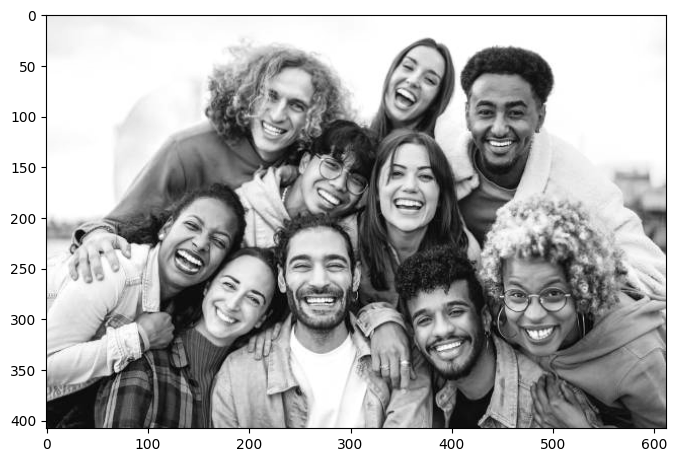

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier( os.path.join(ph_haar, "haarcascade_frontalface_default.xml"))

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [ ]:
faces_detected = "Лиц обнаружено: " + format(len(faces))
print(faces_detected)
# Рисуем квадраты вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image2, (x, y), (x+w, y+h), (255, 255, 0), 2)

Лиц обнаружено: 5


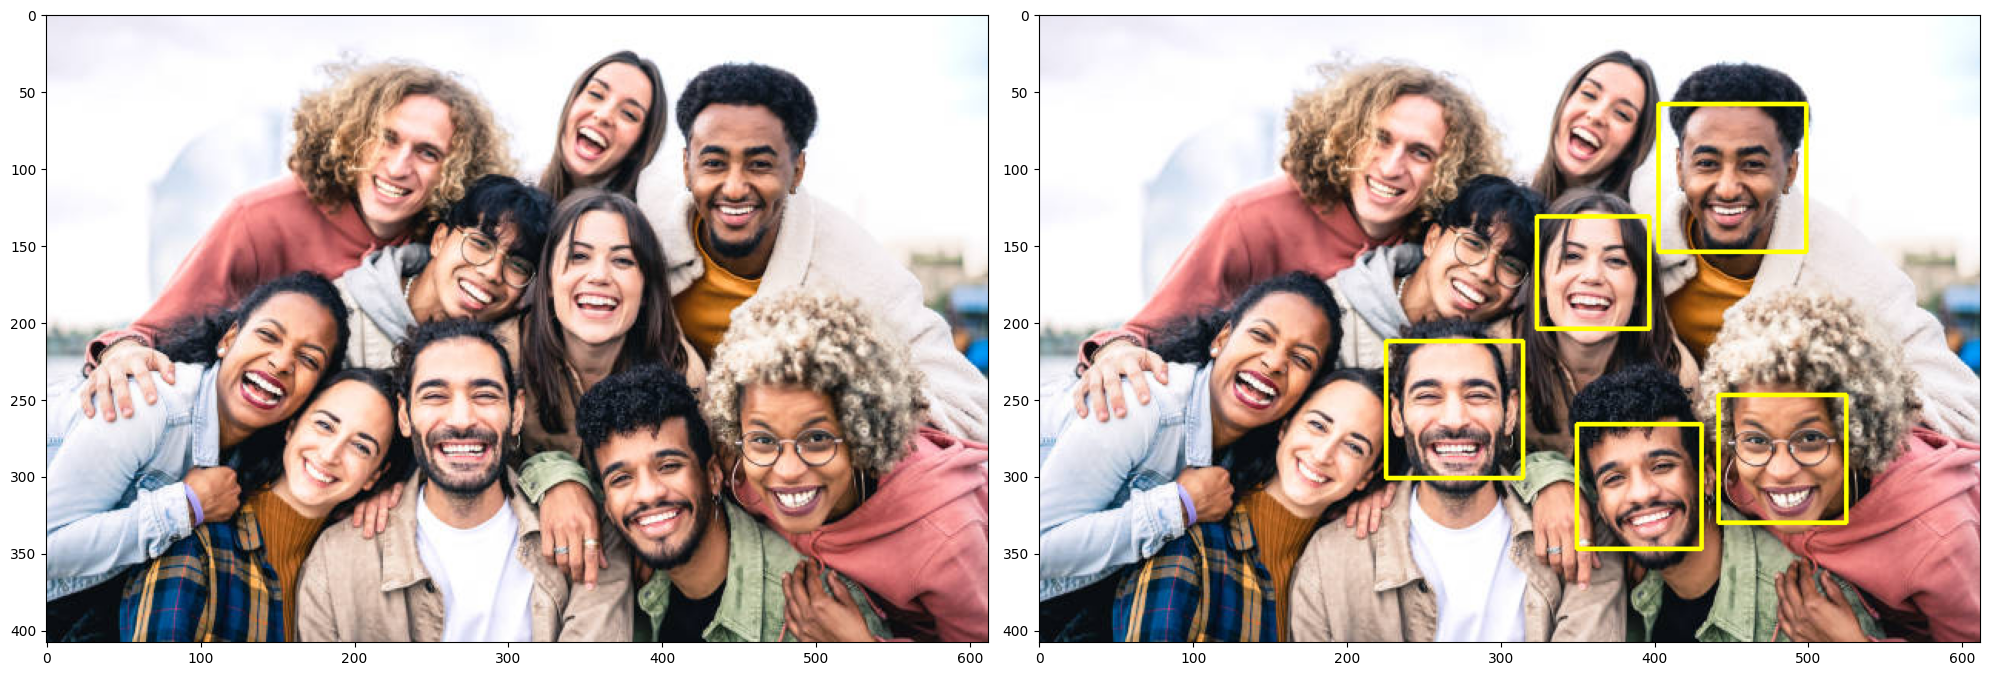

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(image)
axes[1].imshow(image2)
plt.tight_layout()
plt.show()